End2End ML pipeline to classify urban land cover into 9 categories <br>
Dataset - https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover

#### Import Data

In [0]:
!pip install mlflow

  Using cached mlflow-1.30.0-py3-none-any.whl (17.0 MB)
  Using cached docker-6.0.0-py3-none-any.whl (147 kB)
  Using cached prometheus_flask_exporter-0.20.3-py3-none-any.whl (18 kB)
  Using cached SQLAlchemy-1.4.42-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Using cached alembic-1.8.1-py3-none-any.whl (209 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached greenlet-1.1.3.post0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (154 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-9d208372-3fe7-42ba-a356-6cd6cfa6a541/bin/python -m pip install --upgrade pip' command.


In [0]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

import mlflow
import mlflow.pyfunc
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient

pd.set_option('display.max_columns', None)

In [0]:
train = pd.read_csv('file:/dbfs/FileStore/shared_uploads/sanjanarajesh.kothari@sjsu.edu/land_cover_train.csv')
test = pd.read_csv('file:/dbfs/FileStore/shared_uploads/sanjanarajesh.kothari@sjsu.edu/land_cover_test.csv')

#### Exploratory Data Analysis

In [0]:
train.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,BordLngth_40,GLCM3_40,BrdIndx_60,Area_60,Round_60,Bright_60,Compact_60,ShpIndx_60,Mean_G_60,Mean_R_60,Mean_NIR_60,SD_G_60,SD_R_60,SD_NIR_60,LW_60,GLCM1_60,Rect_60,GLCM2_60,Dens_60,Assym_60,NDVI_60,BordLngth_60,GLCM3_60,BrdIndx_80,Area_80,Round_80,Bright_80,Compact_80,ShpIndx_80,Mean_G_80,Mean_R_80,Mean_NIR_80,SD_G_80,SD_R_80,SD_NIR_80,LW_80,GLCM1_80,Rect_80,GLCM2_80,Dens_80,Assym_80,NDVI_80,BordLngth_80,GLCM3_80,BrdIndx_100,Area_100,Round_100,Bright_100,Compact_100,ShpIndx_100,Mean_G_100,Mean_R_100,Mean_NIR_100,SD_G_100,SD_R_100,SD_NIR_100,LW_100,GLCM1_100,Rect_100,GLCM2_100,Dens_100,Assym_100,NDVI_100,BordLngth_100,GLCM3_100,BrdIndx_120,Area_120,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,21.41,20.40,18.69,2.19,0.48,0.87,6.23,1.60,0.74,-0.08,56,4219.69,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,6.57,6.97,7.02,1.52,0.45,0.63,6.35,1.55,0.69,-0.10,156,3682.08,3.01,1188,1.45,209.44,2.25,3.54,181.91,222.46,223.95,9.82,10.37,10.51,2.97,0.63,0.65,7.16,1.43,0.83,-0.10,488,2581.63,4.53,3861,1.96,207.24,3.00,4.70,180.61,219.54,221.58,18.98,19.62,19.38,1.64,0.70,0.50,8.04,1.47,0.45,-0.10,1168,1877.18,4.68,5544,1.93,205.53,3.17,5.12,178.89,217.71,220.01,18.86,19.94,19.61,2.26,0.74,0.48,8.14,1.28,0.78,-0.10,1526,1757.87,4.68,5544,1.93,205.53,3.17,5.12,178.89,217.71,220.01,18.86,19.94,19.61,2.26,0.74,0.48,8.14,1.28,0.78,-0.10,1526,1757.87,4.57,7711,1.66,211.94,2.90,4.97,186.31,223.83,225.68,22.62,22.92,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14,4.57,7711,1.66,211.94,2.90,4.97,186.31,223.83,225.68,22.62,22.92,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,6.16,4.93,5.53,1.14,0.52,0.78,6.19,1.88,0.19,-0.08,144,2943.35,2.32,1095,1.50,232.50,1.93,2.55,208.36,244.07,245.08,6.55,7.01,6.83,2.19,0.49,0.74,6.51,1.61,0.81,-0.08,338,3087.91,2.05,4368,1.27,224.42,1.98,2.22,202.85,234.48,235.94,13.07,13.26,12.99,2.19,0.75,0.71,7.16,1.61,0.82,-0.07,586,1245.19,2.05,4368,1.27,224.42,1.98,2.22,202.85,234.48,235.94,13.07,13.26,12.99,2.19,0.75,0.71,7.16,1.61,0.82,-0.07,586,1245.19,1.93,4606,1.17,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04,1.93,4606,1.17,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04,1.93,4606,1.17,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,5.76,5.56,5.46,2.51,0.50,0.74,6.28,1.51,0.83,-0.09,2

In [0]:
test.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,BordLngth_40,GLCM3_40,BrdIndx_60,Area_60,Round_60,Bright_60,Compact_60,ShpIndx_60,Mean_G_60,Mean_R_60,Mean_NIR_60,SD_G_60,SD_R_60,SD_NIR_60,LW_60,GLCM1_60,Rect_60,GLCM2_60,Dens_60,Assym_60,NDVI_60,BordLngth_60,GLCM3_60,BrdIndx_80,Area_80,Round_80,Bright_80,Compact_80,ShpIndx_80,Mean_G_80,Mean_R_80,Mean_NIR_80,SD_G_80,SD_R_80,SD_NIR_80,LW_80,GLCM1_80,Rect_80,GLCM2_80,Dens_80,Assym_80,NDVI_80,BordLngth_80,GLCM3_80,BrdIndx_100,Area_100,Round_100,Bright_100,Compact_100,ShpIndx_100,Mean_G_100,Mean_R_100,Mean_NIR_100,SD_G_100,SD_R_100,SD_NIR_100,LW_100,GLCM1_100,Rect_100,GLCM2_100,Dens_100,Assym_100,NDVI_100,BordLngth_100,GLCM3_100,BrdIndx_120,Area_120,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,100,4322.47,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,100,4322.47,1.19,452,0.49,196.82,1.27,1.46,169.60,208.71,212.17,18.48,20.90,22.09,3.47,0.71,0.92,7.44,1.56,0.87,-0.10,124,2271.21,3.65,1522,2.70,181.04,5.48,3.69,155.76,192.34,195.03,34.93,39.49,39.17,1.13,0.73,0.28,8.40,1.21,0.23,-0.11,576,1789.91,3.65,1522,2.70,181.04,5.48,3.69,155.76,192.34,195.03,34.93,39.49,39.17,1.13,0.73,0.28,8.40,1.21,0.23,-0.11,576,1789.91,2.75,7618,2.43,189.73,3.62,3.40,163.61,201.29,204.28,25.25,28.33,28.30,3.82,0.79,0.57,8.35,0.96,0.96,-0.10,1188,1298.99,2.93,9172,2.50,185.14,3.94,3.95,159.45,196.43,199.53,27.81,31.55,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,8.15,8.02,8.36,3.05,0.43,0.85,6.75,1.81,0.73,-0.14,220,3331.33,1.08,1353,0.46,49.12,1.09,1.33,38.29,50.40,58.67,8.84,9.97,10.55,3.70,0.51,0.96,6.96,1.67,0.86,-0.14,196,3063.33,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,8.11,9.20,9.61,1.94,0.54,0.86,6.51,1.82,0.69,-0.11,124,2816.16,1.75,1094,1.91,49.05,1.84,1.98,40.06,50.07,57.02,10.54,10.81,11.55,2.57,0.49,0.75,6.93,1.49,0.88,-0.11,262,2668.96,2.53,2826,2.00,45.67,2.85,3.09,38.69,45.68,52.63,9.90,10.70,11.01,3.58,0.61,0.59,7.02,1.14,0.93,-0.08,658,2289.55,2.30,2901,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602,1432.44,2.30,2901,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602,1432.44,2.30,2901,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602,1432.44,3.33,5932,1.69,55.06,2.68,3.89,59.76,48.66,56.76,30.65,18.59,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,28.60,15.88,15.09,3.23,0.73,0.50,7.28,1.03,0.89,0.26,170,2442.01,2.86,871,2.22,90.21,3.34,3.93,117.1

In [0]:
train.shape, test.shape

Out[6]: ((168, 148), (507, 148))

In [0]:
# Merge datasets and split in 80:20 proprtion for train and test
df = pd.concat([train, test])
df.shape

Out[7]: (675, 148)

The dataset contains 148 features. Since the number of records is less, we will perform feature selection/dimensionality reduction to ensure there's no overfitting and it is not coputaitonally expensive.

In [0]:
df.dtypes

Out[8]: class             object
BrdIndx          float64
Area               int64
Round            float64
Bright           float64
Compact          float64
ShpIndx          float64
Mean_G           float64
Mean_R           float64
Mean_NIR         float64
SD_G             float64
SD_R             float64
SD_NIR           float64
LW               float64
GLCM1            float64
Rect             float64
GLCM2            float64
Dens             float64
Assym            float64
NDVI             float64
BordLngth          int64
GLCM3            float64
BrdIndx_40       float64
Area_40            int64
Round_40         float64
Bright_40        float64
Compact_40       float64
ShpIndx_40       float64
Mean_G_40        float64
Mean_R_40        float64
Mean_NIR_40      float64
SD_G_40          float64
SD_R_40          float64
SD_NIR_40        float64
LW_40            float64
GLCM1_40         float64
Rect_40          float64
GLCM2_40         float64
Dens_40          float64
Assym_40         

Target column 'class' is of type object. We will label encode it to represent the 9 classes.

In [0]:
df.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,BordLngth_40,GLCM3_40,BrdIndx_60,Area_60,Round_60,Bright_60,Compact_60,ShpIndx_60,Mean_G_60,Mean_R_60,Mean_NIR_60,SD_G_60,SD_R_60,SD_NIR_60,LW_60,GLCM1_60,Rect_60,GLCM2_60,Dens_60,Assym_60,NDVI_60,BordLngth_60,GLCM3_60,BrdIndx_80,Area_80,Round_80,Bright_80,Compact_80,ShpIndx_80,Mean_G_80,Mean_R_80,Mean_NIR_80,SD_G_80,SD_R_80,SD_NIR_80,LW_80,GLCM1_80,Rect_80,GLCM2_80,Dens_80,Assym_80,NDVI_80,BordLngth_80,GLCM3_80,BrdIndx_100,Area_100,Round_100,Bright_100,Compact_100,ShpIndx_100,Mean_G_100,Mean_R_100,Mean_NIR_100,SD_G_100,SD_R_100,SD_NIR_100,LW_100,GLCM1_100,Rect_100,GLCM2_100,Dens_100,Assym_100,NDVI_100,BordLngth_100,GLCM3_100,BrdIndx_120,Area_120,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.00000,675.00000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.00000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,2.021437,563.342222,1.211541,165.602207,2.159852,2.265511,165.117274,162.635541,169.053748,10.577422,9.311363,9.189852,2.304519,0.557244,0.728341,6.528119,1.603585,0.615600,0.018356,189.238519,2987.935230,2.283230,1382.717037,1.365644,164.626741,2.304356,2.587081,164.112889,161.870459,167.896533,14.758593,13.460237,13.114741,2.682756,0.663185,0.710074,7.061956,1.588993,0.642074,0.018504,354.240000,2183.810948,2.489333,2285.333333,1.481037,164.166385,2.468133,2.815881,163.518726,161.56563,167.41440,18.057259,16.764400,16.241052,2.744459,0.718889,0.691126,7.354030,1.567556,0.649156,0.017689,507.025185,1786.308874,2.744756,3408.925926,1.580993,162.595037,2.668104,3.112385,161.811615,160.100415,165.873230,20.934356,19.789511,19.153674,2.856311,0.753511,0.667570,7.589926,1.53837,0.653067,0.016889,698.642963,1537.058222,2.980548,4664.837037,1.672267,162.254311,2.855215,3.377348,162.088622,159.507867,165.166459,23.607615,22.230859,21.484044,2.956222,0.783244,0.642385,7.776607,1.511081,0.

The scale of data varies significantly and hence will need to be scaled before mdoel training

In [0]:
check_nulls = df.isnull().sum().values
check_nulls

Out[10]: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

There are no missing values in the dataset

Out[11]: <AxesSubplot:>

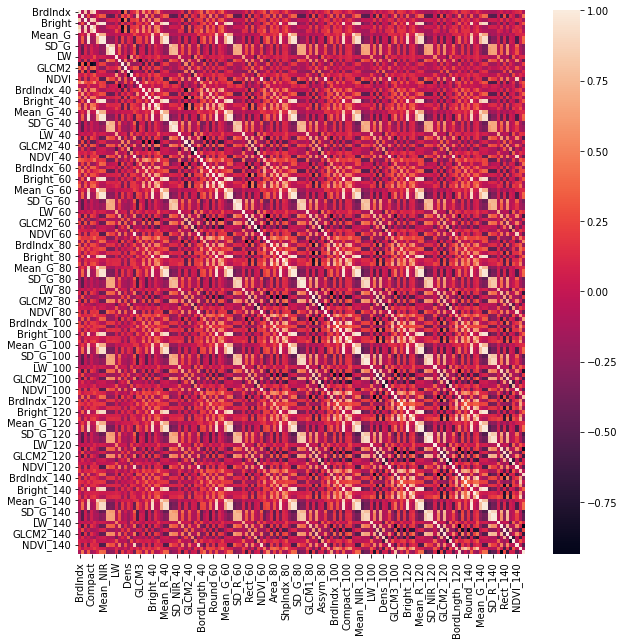

In [0]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())

Some features are highly correlated. These are redundant and can be removed.

/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


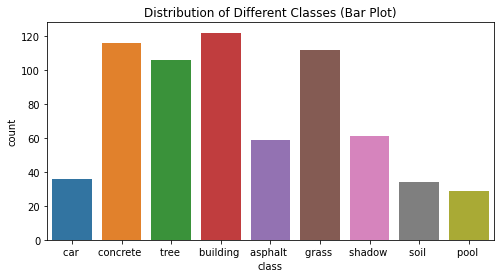

In [0]:
plt.figure(figsize = (8, 4))
sns.countplot('class', data = df)
plt.title('Distribution of Different Classes (Bar Plot)')
plt.show()

#### Data Preparation

In [0]:
# Outlier detection and removal
def detect_outliers(df, n, columns):
    outlier_indices = []
    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        IQR_limit = 1.5 * IQR
        outlier_idx = df[(df[col] < Q1 - IQR_limit) | (df[col] > Q3 + IQR_limit )].index
        outlier_indices.extend(outlier_idx)
        
    outlier_indices = Counter(outlier_indices)   
    multiple_votes = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_votes   

columns = train.drop('class',axis = 1).columns
outliers_to_drop = detect_outliers(df, 4, columns)
df = df[~df.index.isin(outliers_to_drop)]

In [0]:
df.shape

Out[14]: (434, 148)

In [0]:
# Label encode target column
le = preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [0]:
# Train test split
X, y = df.drop(['class'], axis = 1), df[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

In [0]:
# Scaling
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

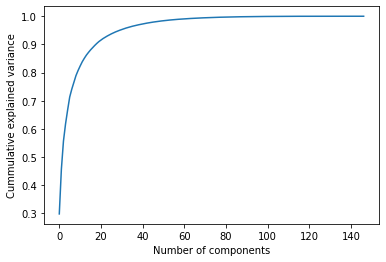

In [0]:
# Dimensionality reduction using PCA
pca = PCA()
pca.fit(X_train_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.show()

We will take ~20 features as it explains close to 90% variance in the data.

In [0]:
model = PCA(n_components = 0.90)
X_train_pca = model.fit_transform(X_train_std)
X_test_pca = model.transform(X_test_std)

X_train_pca_df = pd.DataFrame(X_train_pca, columns = ['PC_' + str(i) for i in range(1, 20)])

In [0]:
X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape

Out[20]: ((368, 19), (66, 19), (368, 1), (66, 1))

Out[21]: <AxesSubplot:>

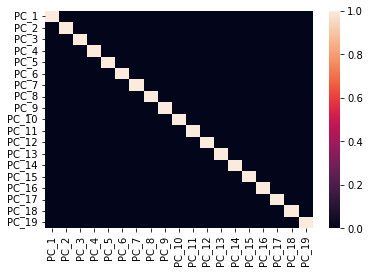

In [0]:
sns.heatmap(X_train_pca_df.corr())

As expected, the components obtained after PCA are not correlated to each other. Therefore, multicollinearity is handled along with dimensionality reduction.

#### Baseline model - Decision Tree Classifier

In [0]:
# Decision Tree 
with mlflow.start_run(run_name = 'decision_tree'):
    model = DecisionTreeClassifier(max_depth = 5, random_state = np.random.RandomState(123))
    model.fit(X_train_pca, y_train)
    pred = model.predict(X_test_pca)
    pred_prob = model.predict_proba(X_test_pca)
    auc_score = roc_auc_score(y_test, pred_prob, multi_class = 'ovr')
    
    mlflow.log_metric('auc', auc_score)
    
    signature = infer_signature(X_train_pca, model.predict(X_train_pca))
    mlflow.pyfunc.log_model('decision_tree_model', 'model', signature = signature)

2022/10/29 20:18:25 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmph9u23wax/model, flavor: python_function), fall back to return ['cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback.


In [0]:
# Register model
run_id = mlflow.search_runs(filter_string = 'tags.mlflow.runName = "decision_tree"').iloc[0].run_id
model_name = 'DevUrbanLandClassifier_DecisionTree'
model_version = mlflow.register_model(f'runs:/{run_id}/decision_tree_model', model_name)

# Move model to production
# client = MlflowClient()
# client.transition_model_version_stage(name = model_name, version = model_version.version, stage = 'Production')

Registered model 'DevUrbanLandClassifier_DecisionTree' already exists. Creating a new version of this model...
2022/10/29 20:18:29 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: DevUrbanLandClassifier_DecisionTree, version 2
Created version '2' of model 'DevUrbanLandClassifier_DecisionTree'.
Out[29]: <ModelVersion: creation_timestamp=1667074709363, current_stage='Production', description='', last_updated_timestamp=1667074715585, name='DevUrbanLandClassifier_DecisionTree', run_id='ffaa03af980a4d03805aa7a5a95d00d4', run_link='', source='dbfs:/databricks/mlflow-tracking/3100943094356710/ffaa03af980a4d03805aa7a5a95d00d4/artifacts/decision_tree_model', status='READY', status_message='', tags={}, user_id='2108747361688375', version='2'>

#### New model - XGBoost Classifier

In [0]:
# XGBoost Clasifier
with mlflow.start_run(run_name = 'xgboost'):
    model = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05, max_depth = 1, random_state = 0)
    model.fit(X_train_pca, y_train)
    pred_prob = model.predict_proba(X_test_pca)
    
    auc_score = roc_auc_score(y_test, pred_prob, multi_class = 'ovr')
    mlflow.log_metric('auc', auc_score)

    signature = infer_signature(X_train_pca, model.predict(X_train_pca))
    mlflow.pyfunc.log_model('xgboost_model', 'model', signature = signature)

/databricks/python/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
2022/10/29 20:18:41 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpv4pynw7l/model, flavor: python_function), fall back to return ['cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback.


In [0]:
# Register model
run_id = mlflow.search_runs(filter_string = 'tags.mlflow.runName = "xgboost"').iloc[0].run_id
model_name = 'DevUrbanLandClassifier_XGBoost'
model_version = mlflow.register_model(f'runs:/{run_id}/xgboost_model', model_name)

# Move model to production
client = MlflowClient()
client.transition_model_version_stage(name = model_name, version = model_version.version, stage = 'Production')

Registered model 'DevUrbanLandClassifier_XGBoost' already exists. Creating a new version of this model...
2022/10/29 20:18:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: DevUrbanLandClassifier_XGBoost, version 2
Created version '2' of model 'DevUrbanLandClassifier_XGBoost'.
Out[31]: <ModelVersion: creation_timestamp=1667074721803, current_stage='Production', description='', last_updated_timestamp=1667074728000, name='DevUrbanLandClassifier_XGBoost', run_id='a6ee69eda11f42d4bd6ffca516ccdc66', run_link='', source='dbfs:/databricks/mlflow-tracking/3100943094356710/a6ee69eda11f42d4bd6ffca516ccdc66/artifacts/xgboost_model', status='READY', status_message='', tags={}, user_id='2108747361688375', version='2'>

In [0]:
# Load model from registry and run 
model_uri = 'models:/{model_name}/Production'.format(model_name = model_name)
model = mlflow.pyfunc.load_model(model_uri)
# Sanity-check: This should match the AUC logged by MLflow
print(f'AUC: {roc_auc_score(y_test, model.predict(X_test_pca))}')

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<command-1151182179586154> in <cell line: 3>()
      1 # Load model from registry and run
      2 model_uri = 'models:/{model_name}/Production'.format(model_name = model_name)
----> 3 model = mlflow.pyfunc.load_model(model_uri)
      4 # Sanity-check: This should match the AUC logged by MLflow
      5 print(f'AUC: {roc_auc_score(y_test, model.predict(X_test_pca))}')

/local_disk0/.ephemeral_nfs/envs/pythonEnv-9d208372-3fe7-42ba-a356-6cd6cfa6a541/lib/python3.9/site-packages/mlflow/pyfunc/__init__.py in load_model(model_uri, suppress_warnings, dst_path)
    503     _add_code_from_conf_to_system_path(local_path, conf, code_key=CODE)
    504     data_path = os.path.join(local_path, conf[DATA]) if (DATA in conf) else local_path
--> 505     model_impl = importlib.import_module(conf[MAIN])._load_pyfunc(data_path)
    506     predict_fn = conf.